## Local Binary Pattern Example 2
### CS4243, Amir, 2022

In [1]:
import math as m
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

In [2]:
#img = cv2.imread('IMG_0054.JPG',0)
img = np.array( [ [1,1,1,1,1] , [1,1,1,1,1] , [12,12,12,12,12] ,
                 [12,12,12,12,12] , [12,12,12,12,12] ] )

In [3]:
# function to compute the power of an image, ither RGb or graylevel
def am_power2(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

In [4]:
# showing the result
cv2.imshow("The Image" , np.uint8(img) )


In [5]:
# function that provides the standard lbp of a pixel
# it uses the definition mentioned in the course slides
# a is the image matrix, <x,y> is the position of the target pixel, returned value, ans
# is the lbp of that pixel. 
#
def lbpmask(a,x,y):
    k = [1,2,4, 128,0,8, 64,32,16]
    kk=0
    ans=0
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
            ans += (a[i,j] >= a[x,y])*k[kk]
            kk += 1
    
    return ans

In [6]:
# the main LBP function 
# input: the image matrix img, outputs: lbp result, lbp's histogram, and power
# first/last row/col of lbp matrix is 0, we compute the lbp for pixels between [1:M[0]-1 , 1:M[1]-1]
#
def am_lbp(img):
    M = img.shape
    lbpres = np.zeros(M)
    for i in range(1,M[0]-1):
        for j in range(1,M[1]-1):
            lbpres[i,j] = lbpmask(img,i,j)
            
    hist1,_ = np.histogram(lbpres.flatten(),256,[0,256])
    pow1 = am_power2(lbpres)

    return lbpres , hist1 , pow1


In [7]:
# calling the function
lbpres , hist2 , pow2 = am_lbp( img )

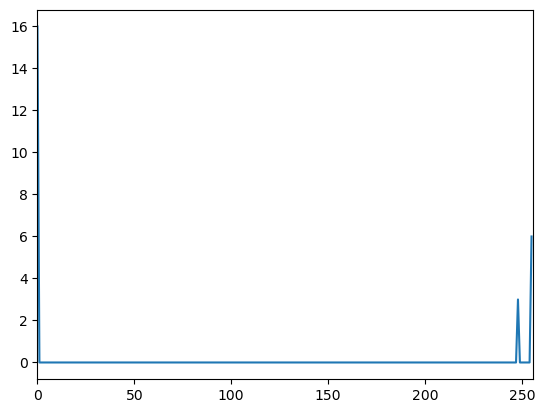

In [8]:
# LBP histogram 
#

plt.plot(range(256) , hist2)
plt.xlim([0,256])
plt.show()

In [9]:
print(lbpres)
print('========================')
print(hist2)
print('========================')
print(pow2)

[[  0.   0.   0.   0.   0.]
 [  0. 255. 255. 255.   0.]
 [  0. 248. 248. 248.   0.]
 [  0. 255. 255. 255.   0.]
 [  0.   0.   0.   0.   0.]]
[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  6]
22986.48


In [10]:
# showing the result
cv2.namedWindow("LBP", cv2.WINDOW_NORMAL)
cv2.imshow("LBP" , np.uint8(lbpres))

In [11]:
cv2.waitKey(0)
cv2.destroyAllWindows() 